# Hierarchical Clustering

## Que: Perform Clustering (Hierarchical) for the crime data and identify the number of clusters formed and draw inferences.


### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
import seaborn as sns

### Importing the Data

In [25]:
crime=pd.read_csv('/content/crime_data.csv')
crime.head(6)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7


## Data Understanding

In [4]:
crime.shape

(50, 5)

In [5]:
crime.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [6]:
crime.duplicated().sum()

0

In [7]:
crime_d1 = crime.iloc[:,1:5]
crime_d1.head(6)

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7


## Data Preparation

In [8]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [9]:
st_scaler = StandardScaler()
crime_std = st_scaler.fit_transform(crime_d1)
crime_std = pd.DataFrame(data= crime_std, columns=['Murder','Assault','UrbanPop','Rape'])
crime_std.head(6)

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901


## Dendrogram

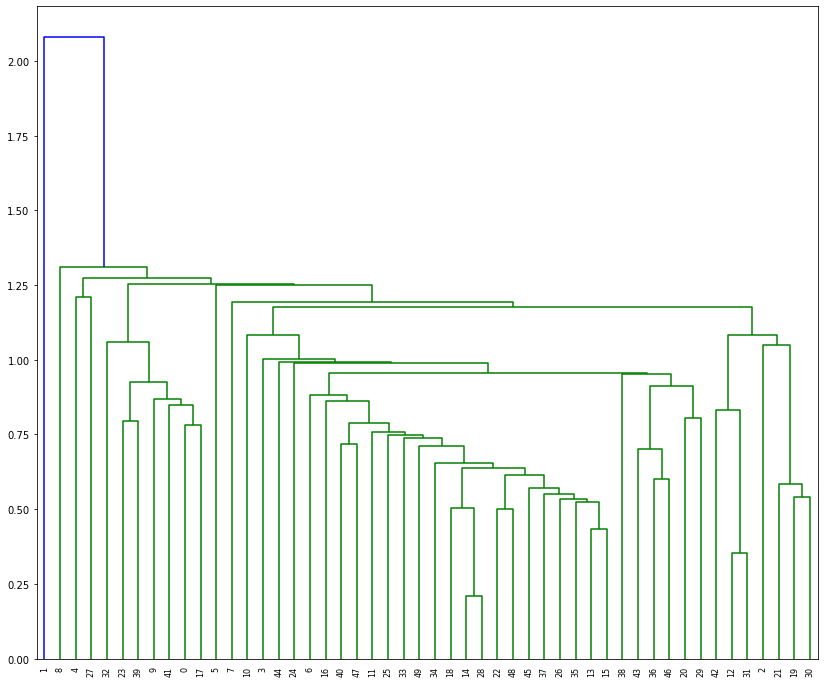

In [10]:
plt.figure(figsize=(14,12)) 
dendo = sch.dendrogram(sch.linkage(crime_std,'single'))

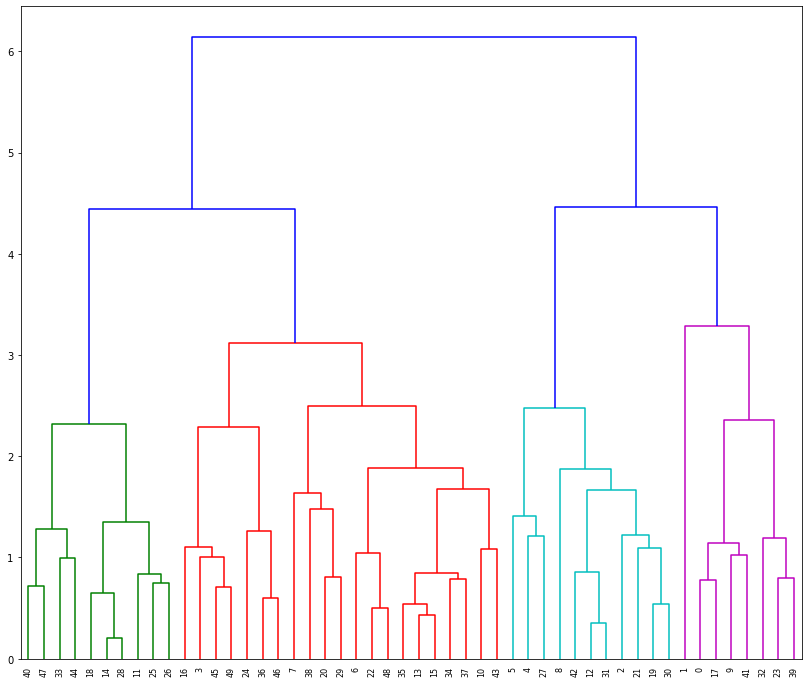

In [11]:
plt.figure(figsize=(14,12)) 
dendo = sch.dendrogram(sch.linkage(crime_std,'complete'))

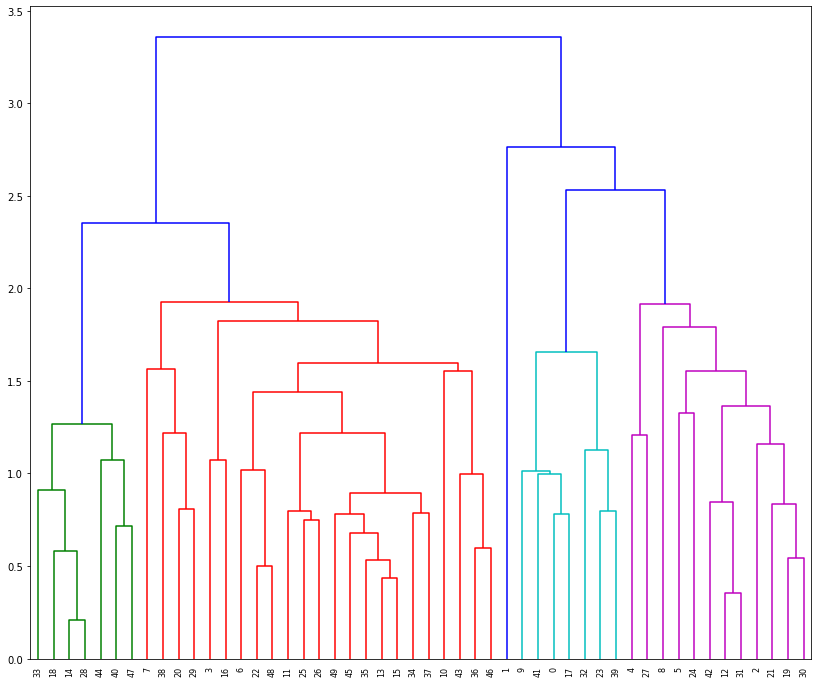

In [12]:

plt.figure(figsize=(14,12)) 
dendo = sch.dendrogram(sch.linkage(crime_std,'average'))

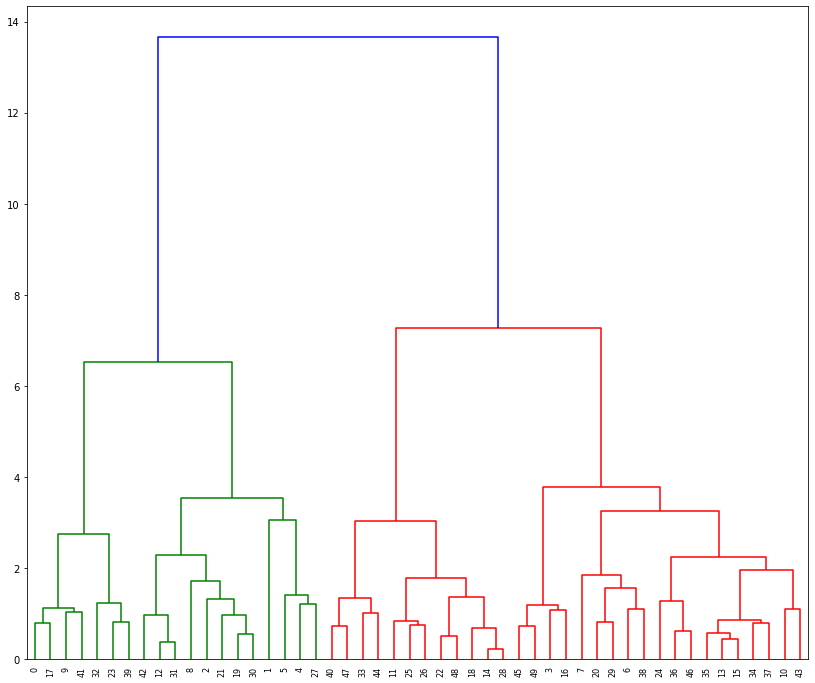

In [13]:
plt.figure(figsize=(14,12)) 
dendo = sch.dendrogram(sch.linkage(crime_std,'ward'))

## Model Builing and Model Training

In [14]:
hc =AgglomerativeClustering(n_clusters=4 ,affinity='euclidean',linkage='complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=4)

## Predicting the model  

In [15]:
y_hc = hc.fit_predict(crime_std)
y_hc

array([0, 0, 2, 1, 2, 2, 1, 1, 2, 0, 1, 3, 2, 1, 3, 1, 1, 0, 3, 2, 1, 2,
       1, 0, 1, 3, 3, 2, 3, 1, 2, 2, 0, 3, 1, 1, 1, 1, 1, 0, 3, 0, 2, 1,
       3, 1, 1, 3, 1, 1])

In [16]:
clusters = pd.DataFrame(y_hc,columns=['clusters'])
clusters.head()

,clusters
0,0
1,0
2,2
3,1
4,2


In [17]:
crime['clusters']= clusters
crime.head(6)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2


In [18]:
crime['clusters'].value_counts()

1    21
2    11
3    10
0     8
Name: clusters, dtype: int64

In [19]:
crime[crime['clusters']==0]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
9,Georgia,17.4,211,60,25.8,0
17,Louisiana,15.4,249,66,22.2,0
23,Mississippi,16.1,259,44,17.1,0
32,North Carolina,13.0,337,45,16.1,0
39,South Carolina,14.4,279,48,22.5,0
41,Tennessee,13.2,188,59,26.9,0


In [20]:
crime[crime['clusters']==1]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
3,Arkansas,8.8,190,50,19.5,1
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
10,Hawaii,5.3,46,83,20.2,1
13,Indiana,7.2,113,65,21.0,1
15,Kansas,6.0,115,66,18.0,1
16,Kentucky,9.7,109,52,16.3,1
20,Massachusetts,4.4,149,85,16.3,1
22,Minnesota,2.7,72,66,14.9,1
24,Missouri,9.0,178,70,28.2,1


In [21]:
crime[crime['clusters']==2]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
2,Arizona,8.1,294,80,31.0,2
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
8,Florida,15.4,335,80,31.9,2
12,Illinois,10.4,249,83,24.0,2
19,Maryland,11.3,300,67,27.8,2
21,Michigan,12.1,255,74,35.1,2
27,Nevada,12.2,252,81,46.0,2
30,New Mexico,11.4,285,70,32.1,2
31,New York,11.1,254,86,26.1,2


In [22]:
crime[crime['clusters']==3]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
11,Idaho,2.6,120,54,14.2,3
14,Iowa,2.2,56,57,11.3,3
18,Maine,2.1,83,51,7.8,3
25,Montana,6.0,109,53,16.4,3
26,Nebraska,4.3,102,62,16.5,3
28,New Hampshire,2.1,57,56,9.5,3
33,North Dakota,0.8,45,44,7.3,3
40,South Dakota,3.8,86,45,12.8,3
44,Vermont,2.2,48,32,11.2,3
47,West Virginia,5.7,81,39,9.3,3


In [23]:
crime.groupby(by='clusters').agg(['mean']).reset_index()

,clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,14.087500,252.750000,53.500000,24.537500
1,1,5.871429,134.476190,70.761905,18.580952
2,2,11.054545,264.090909,79.090909,32.618182
3,3,3.180000,78.700000,49.300000,11.630000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


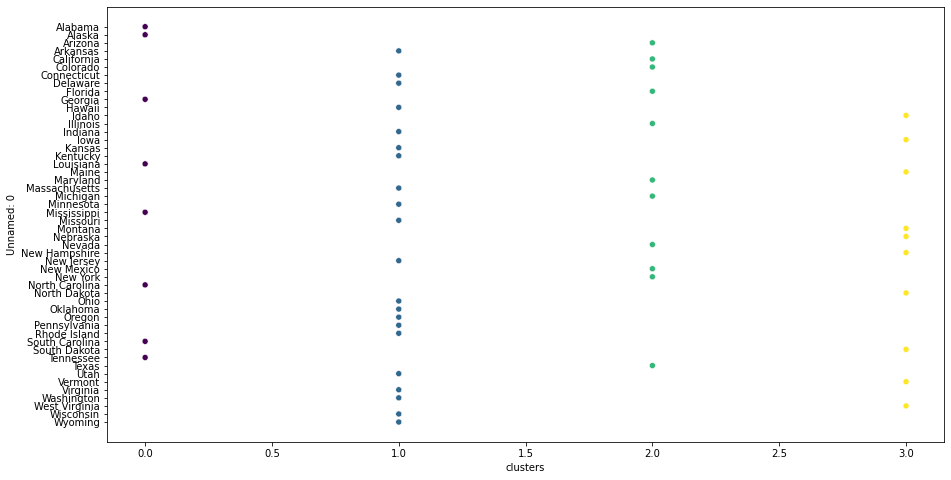

In [24]:
plt.figure(figsize=(15,8))
sns.scatterplot(crime['clusters'],crime['Unnamed: 0'],c=hc.labels_) 
plt.show()